Retail Analysis with Walmart Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_wss = pd.read_csv('Walmart_Store_sales.csv')
df_wss.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df_wss.shape

(6435, 8)

In [4]:
df_wss.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df_wss.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Basic Statistic Task
# Which store has maximum sales

In [6]:
#Values of the Total Weekly_Sales for each store
df_groupby = df_wss.groupby('Store')['Weekly_Sales'].sum()
print(df_groupby.shape)
print(df_groupby.head())

(45,)
Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64


In [7]:
#Store with Maximum Sales and Value of the Sales
print( 'Store Number {} has maximum total weekly sales of {}.'.format (df_groupby.idxmax(),df_groupby.max()))

Store Number 20 has maximum total weekly sales of 301397792.46000004.


# Which store has maximum standard deviation i.e., the sales vary a lot. Also,to find out the coefficient of mean to standard deviation


In [8]:
#Value of Standard Deviations
df_groupstd = df_wss.groupby('Store')['Weekly_Sales'].std()
print(df_groupstd.shape)
print(df_groupstd)

(45,)
Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64


In [9]:
#Store with Maximum Standard Deviation
print( 'Store Number {} has Maximum Standard Deviation of {}.'.format (df_groupstd.idxmax(),df_groupstd.max()))

Store Number 14 has Maximum Standard Deviation of 317569.9494755081.


In [10]:
#Coefficient of mean to standard deviation
df_groupmean = df_wss.groupby('Store')['Weekly_Sales'].mean()
print(df_groupmean.shape)
cms = (df_groupstd.sum()/df_groupmean.sum())*100
print(cms)

(45,)
13.523458876035265


# Which store/s has good quarterly growth rate in Q3’2012
#Store/s that has good quarterly growth rate in Q3’2012(July 1 to September 30)

In [11]:
df_Q32012=df_wss[(pd.to_datetime(df_wss['Date'])>= pd.to_datetime('01-07-2012'))&(pd.to_datetime(df_wss['Date'])<= pd.to_datetime('30-09-2012'))]
df_wss_growth = df_Q32012.groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} has a good Quartely Growth in 3rd Quarter(Q3) of 2012 {}".format(df_wss_growth.idxmax(),df_wss_growth.max()))

Store Number 4 has a good Quartely Growth in 3rd Quarter(Q3) of 2012 77516251.42


# Some holidays have a negative impact on sales.
# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [12]:
# Stores Holiday
stores_holiday_sales = df_wss[df_wss['Holiday_Flag'] == 0]
#Store_non_holiday
stores_nonholiday_sales = df_wss[df_wss['Holiday_Flag'] == 1]


In [13]:
stores_holiday_sales_mean = df_wss[(df_wss['Holiday_Flag'] == 0)]['Weekly_Sales'].mean()
stores_nonholiday_sales_sum = df_wss[(df_wss['Holiday_Flag'] == 1)].groupby('Date')['Weekly_Sales'].sum()

In [14]:
print(stores_nonholiday_sales_sum>stores_holiday_sales_mean)

Date
07-09-2012    True
09-09-2011    True
10-02-2012    True
10-09-2010    True
11-02-2011    True
12-02-2010    True
25-11-2011    True
26-11-2010    True
30-12-2011    True
31-12-2010    True
Name: Weekly_Sales, dtype: bool


#  Correlation Plot using heatmap


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

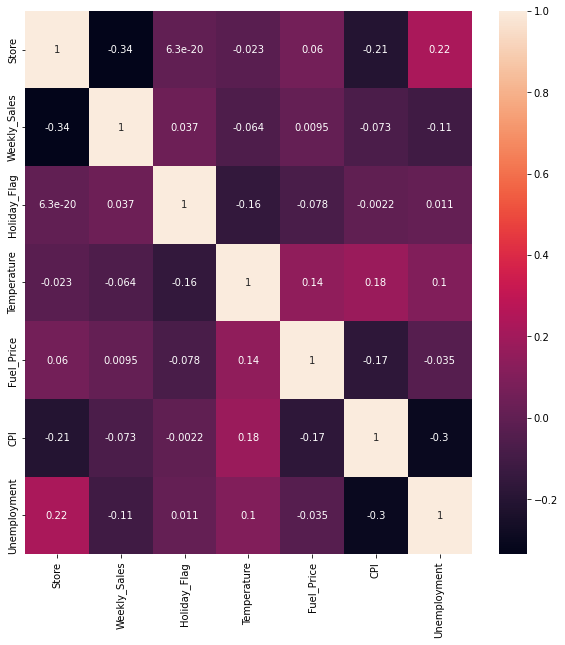

In [16]:
corr = df_wss.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)             
plt.plot()

In [17]:
# Correlation Values
df_wss[['Store','CPI','Fuel_Price','Unemployment','Weekly_Sales']].corr()   

,Store,CPI,Fuel_Price,Unemployment,Weekly_Sales
Store,1.000000,-0.209492,0.060023,0.223531,-0.335332
CPI,-0.209492,1.000000,-0.170642,-0.302020,-0.072634
Fuel_Price,0.060023,-0.170642,1.000000,-0.034684,0.009464
Unemployment,0.223531,-0.302020,-0.034684,1.000000,-0.106176
Weekly_Sales,-0.335332,-0.072634,0.009464,-0.106176,1.000000


In [18]:
# Change dates into days by creating new variable.
df_wss['Days'] = pd.to_datetime(df_wss['Date']).dt.day_name()
df_wss.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Monday


# Statistical Model
# 
# For Store 1 – Build  prediction models to forecast demand
# 
# Linear Regression 
# Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order).
# 
# SLR

In [19]:
#import LinearRegression model from sklearn package 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [20]:
#Feature
X_features = df_wss[df_wss['Store'] ==1][['Store','Date']]
next_date = df_wss[df_wss['Store'] ==1]['Date']
next_date.index +=1
X_features.Date = next_date.index
print(X_features.shape)
print(X_features.head())


(143, 2)
   Store  Date
0      1     1
1      1     2
2      1     3
3      1     4
4      1     5


In [21]:
#Target
y_targets = df_wss[df_wss['Store']==1][['Store','Weekly_Sales']] #Store 1 Weekly_Sales is the target
print(y_targets.shape)
print(y_targets.head())

(143, 2)
   Store  Weekly_Sales
0      1    1643690.90
1      1    1641957.44
2      1    1611968.17
3      1    1409727.59
4      1    1554806.68


In [22]:
#Train and Test split
X_train,X_test,y_train,y_test = train_test_split(X_features,y_targets,random_state = 21)


In [23]:
#Calling Linear Regression and fitting the model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
#Intercept and Coefficient Values
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

Intercept:  [1.00000000e+00 1.48003198e+06]
Coefficient:  [[  0.           0.        ]
 [  0.         944.85378805]]


In [25]:
#Predicting using the feature test values 
y_pred_slr = lm.predict(X_test)

In [26]:
#Root mean square error value and score(Accuracy) calculation
print("RMSE Value: ",np.sqrt(metrics.mean_squared_error(y_pred_slr,y_test))) 
accuracy = metrics.r2_score(y_test,y_pred_slr)
print("Accuracy: ",accuracy)

RMSE Value:  142629.0580637676
Accuracy:  0.48388547025022033


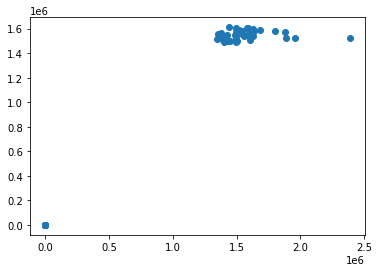

In [27]:
#Scatter Plot for predicted values
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
plt.scatter(y_test,y_pred_slr) 
plt.show()

# MLR


In [28]:
#Feature
X_feature = df_wss[df_wss['Store'] ==1][['Store','CPI', 'Unemployment','Fuel_Price']]
print(X_feature.head())
#Target
y_target = df_wss[df_wss['Store']==1][['Store','Weekly_Sales']] #Store 1 Weekly_Sales is the target
print(y_target.head())

   Store         CPI  Unemployment  Fuel_Price
0      1  211.096358         8.106       2.572
1      1  211.242170         8.106       2.548
2      1  211.289143         8.106       2.514
3      1  211.319643         8.106       2.561
4      1  211.350143         8.106       2.625
   Store  Weekly_Sales
0      1    1643690.90
1      1    1641957.44
2      1    1611968.17
3      1    1409727.59
4      1    1554806.68


In [29]:
#Train and Test split
X_train,X_test,y_train,y_test = train_test_split(X_feature,y_target,random_state = 21)


In [30]:
#Calling Linear Regression and fitting the model
linreg = LinearRegression()
linreg.fit(X_train,y_train)


LinearRegression()

In [31]:
#Predicting using the feature test values
y_pred_mlr = linreg.predict(X_test)

In [32]:
#Intercept and Coefficient Values
print("Intercept: ",linreg.intercept_)
print("Coefficient: ",linreg.coef_)

Intercept:  [ 1.00000000e+00 -5.58124608e+06]
Coefficient:  [[     0.              0.              0.              0.        ]
 [     0.          27771.28586632 173495.37854177 -58855.15513113]]


In [33]:
#Root mean square error value and r2_score(Accuracy) calculation
print("RMSE Value: ",np.sqrt(metrics.mean_squared_error(y_pred_mlr,y_test))) 
accuracy = metrics.r2_score(y_test,y_pred_mlr)
print("Accuracy: ",accuracy)


RMSE Value:  148439.4678314597
Accuracy:  0.4409780834834336


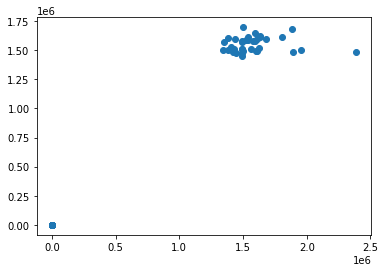

In [34]:
#Scatter Plot for predicted values
plt.scatter(y_test,y_pred_mlr) 
plt.show()

In [39]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
#Degree of polynomial is 3
PolyReg = PolynomialFeatures(degree = 3)
#Transform features for polynomial regression 
X_feature_PolyReg = PolyReg.fit_transform(X_feature)
# Pipeline is created by creating a list of tuples including the name of model or estimator and its correspondign constructor
#for Polynomial regression
Pip_Input =[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
# Pipeline the above input
pipe = Pipeline(Pip_Input)
print(pipe)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])


In [41]:
# Fit the model and predicting the first four 'Weekly_Sales' using Polynomial regression
pipe.fit(X_feature_PolyReg,y_target)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [42]:
Ypipehat = pipe.predict(X_feature_PolyReg)
print(Ypipehat[0:4])

[[1.000000e+00 1.674632e+06]
 [1.000000e+00 1.573768e+06]
 [1.000000e+00 1.630344e+06]
 [1.000000e+00 1.440392e+06]]


In [43]:
#shape of features in Polyreg
print(X_feature.shape)
print(X_feature_PolyReg.shape)

(143, 4)
(143, 35)


In [44]:
from math import sqrt
from sklearn. metrics import r2_score
from sklearn.metrics import mean_squared_error

In [45]:
#Root mean square error value and score(Accuracy) calculation
r_squared = r2_score(y_target, Ypipehat)
print('R-squared :', r_squared)
print('RMSE:' , sqrt(mean_squared_error(y_target,Ypipehat)))

R-squared : 0.850954407069321
RMSE: 60007.67173079369


In [46]:
# CPI positive impact on sales
# 
# Unemployment positive impact on sales
# Fuel_Price negative impact on sales
# Select the model which gives best accuracy.
# Polynomial Regression with degree 3 gives the best accuracy of 85%
# Simple Linear Regression gives 48% of accuracy and
# Multiple Linear Regression gives 44% of accuracy
